# 그래프 작업

## 모듈 설치

In [2]:
pip install GraphViz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


# 임동혁 승리 10 경기 기록

In [4]:
import pandas as pd
from IPython.display import display
import numpy as np

## 임동혁 지표 

In [5]:
# 아포짓 지표를 정리한 엑셀 불러오기 - 임동혁 지표
Lim_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁,비예나 지표.xlsx', sheet_name = '임동혁3')
print(Lim_indicator)

   경기    오픈   퀵오픈    후위    서브   블로킹
0   1  0.80  0.96  0.81  0.92  1.00
1   2  0.78  0.93  0.71  1.00  0.85
2   3  0.88  0.78  0.64  0.96  0.85
3   4  0.84  0.87  0.89  1.00  0.33
4   5  0.79  0.90  0.63  0.92  0.94
5   6  0.73  0.96  0.58  0.93  0.96
6   7  0.71  0.88  0.58  0.94  0.96
7   8  0.66  0.82  0.72  0.88  0.97
8   9  0.79  0.82  0.81  0.77  0.96
9  10  0.94  0.92  0.75  1.00  1.00


## 임동혁 지표 수치 변환

In [6]:
# betweeness centrality
# 가중치가 낮을수록 중심성 커짐
# 원래 수치는 값이 클수록 (+)
# 변환된 수치 = 1 - 원래 수치

Lim_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁,비예나 지표.xlsx', sheet_name = '임동혁3')
print(Lim_indicator, '\n')

print(Lim_indicator['오픈'], '\n')

print(Lim_indicator['오픈'].values[0], '\n')


# 가중치1
Lim_weight1 = []
for i in range(10):
    Lim_weight1.append(Lim_indicator['오픈'].values[i])
for i in range(10):
    Lim_weight1.append(Lim_indicator['퀵오픈'].values[i])
for i in range(10):
    Lim_weight1.append(Lim_indicator['후위'].values[i])
for i in range(10):
    Lim_weight1.append(Lim_indicator['서브'].values[i])
for i in range(10):
    Lim_weight1.append(Lim_indicator['블로킹'].values[i])
    
# 가중치1의 type 변환 : numpy.float64 -> float
for i in range(50):
    Lim_weight1[i] = float(Lim_weight1[i])

print(Lim_weight1, '\n')
print(Lim_weight1[0], '\n')
print(type(Lim_weight1[0]))

   경기    오픈   퀵오픈    후위    서브   블로킹
0   1  0.80  0.96  0.81  0.92  1.00
1   2  0.78  0.93  0.71  1.00  0.85
2   3  0.88  0.78  0.64  0.96  0.85
3   4  0.84  0.87  0.89  1.00  0.33
4   5  0.79  0.90  0.63  0.92  0.94
5   6  0.73  0.96  0.58  0.93  0.96
6   7  0.71  0.88  0.58  0.94  0.96
7   8  0.66  0.82  0.72  0.88  0.97
8   9  0.79  0.82  0.81  0.77  0.96
9  10  0.94  0.92  0.75  1.00  1.00 

0    0.80
1    0.78
2    0.88
3    0.84
4    0.79
5    0.73
6    0.71
7    0.66
8    0.79
9    0.94
Name: 오픈, dtype: float64 

0.8 

[0.8, 0.78, 0.88, 0.84, 0.79, 0.73, 0.71, 0.66, 0.79, 0.94, 0.96, 0.93, 0.78, 0.87, 0.9, 0.96, 0.88, 0.82, 0.82, 0.92, 0.81, 0.71, 0.64, 0.89, 0.63, 0.58, 0.58, 0.72, 0.81, 0.75, 0.92, 1.0, 0.96, 1.0, 0.92, 0.93, 0.94, 0.88, 0.77, 1.0, 1.0, 0.85, 0.85, 0.33, 0.94, 0.96, 0.96, 0.97, 0.96, 1.0] 

0.8 

<class 'float'>


## 임동혁 그래프 그리기

('1', 'open', 0.8)


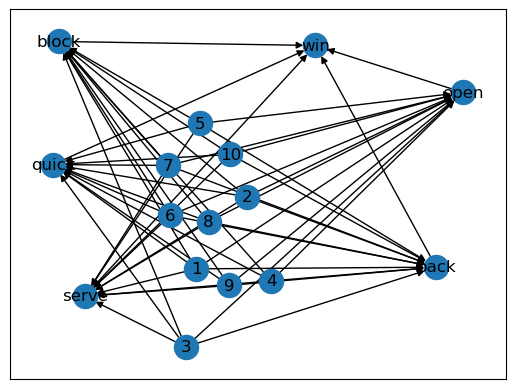

In [7]:
# 임동혁 그래프
import networkx as nx
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt


game_node = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
indicator_node = ['open', 'quick', 'back', 'serve', 'block']
edges1 = []
edges2 = []

# game_node와 indicator_node 엣지 -> edge1에 저장
for i in indicator_node:
    for j in game_node:
        edges1.append((j, i))
        
# edge1에 weight1 추가
for i in range(50):
    edges1[i] += (Lim_weight1[i],)
    
print(edges1[0])    

# indicator_node와 'win' 엣지 -> edge2에 저장 
for elem in indicator_node:
    edges2.append((elem, 'win'))

# edge2에 weight2 추가
Lim_weight2 = [0.85, 0.90, 0.875, 0.825, 0.80]

for i in range(5):
    edges2[i] += (Lim_weight2[i],)
    
# 노드 추가
G_Lim = nx.DiGraph()
G_Lim.add_node('win')
G_Lim.add_nodes_from(game_node)
G_Lim.add_nodes_from(indicator_node)


# 엣지 추가 + 가중치 추가
G_Lim.add_weighted_edges_from(edges1)
G_Lim.add_weighted_edges_from(edges2)

nx.draw_networkx(G_Lim)

plt.savefig('graph_lim.png')
plt.show()

## 매개중심성 구하기

In [7]:
Lim_btw_cent = nx.betweenness_centrality(G_Lim, k=None, normalized=False, weight='weight', endpoints=False, seed=None)

sorted_nodes = sorted(Lim_btw_cent.items(), key=lambda x:x[1], reverse=True)

print(sorted_nodes)

[('back', 6.0), ('open', 2.0), ('serve', 1.0), ('block', 1.0), ('win', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0), ('10', 0.0), ('quick', 0.0)]


## 막대 그래프로 나타내기

In [29]:
label = ['open', 'quick', 'back', 'serve', 'block']
Lim_win_value = [2.0, 0.0, 6.0, 1.0, 1.0]
index = np.arange(len(label))

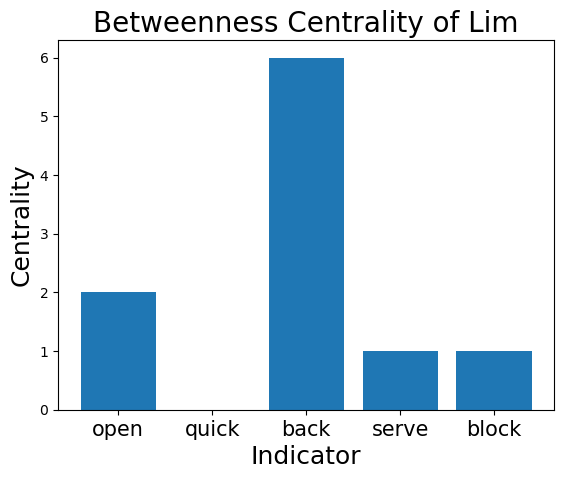

In [30]:
plt.bar(index, Lim_win_value)
plt.title('Betweenness Centrality of Lim', fontsize=20)
plt.xlabel('Indicator', fontsize=18)
plt.ylabel('Centrality', fontsize=18)
plt.xticks(index, label, fontsize=15)
#plt.savefig('Stick_Graph_Lim.png')
plt.show()

# 임동혁 패배 5 경기 기록

## 임동혁 지표 

In [10]:
import pandas as pd
from IPython.display import display
import numpy as np

In [11]:
# 아포짓 지표를 정리한 엑셀 불러오기 - 임동혁 지표
Lim_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁, 비예나 패배 경기 지표.xlsx', sheet_name = '임동혁3')
print(Lim_indicator)

   _x0008_경기    오픈   퀵오픈    후위    서브   블로킹
0          1  0.83  0.91  0.71  0.88  0.94
1          2  0.80  0.83  0.52  0.88  0.98
2          3  0.66  0.87  0.81  0.82  0.96
3          4  0.82  0.83  0.57  0.90  0.88
4          5  0.70  0.83  0.71  1.00  0.92


## 임동혁 수치 변환

In [12]:
# betweeness centrality
# 가중치가 낮을수록 중심성 커짐
# 원래 수치는 값이 클수록 (+)
# 변환된 수치 = 1 - 원래 수치

Lim_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁, 비예나 패배 경기 지표.xlsx', sheet_name = '임동혁3')
print(Lim_indicator, '\n')

print(Lim_indicator['오픈'], '\n')

print(Lim_indicator['오픈'].values[0], '\n')


# 가중치1
Lim_weight1 = []
for i in range(5):
    Lim_weight1.append(Lim_indicator['오픈'].values[i])
for i in range(5):
    Lim_weight1.append(Lim_indicator['퀵오픈'].values[i])
for i in range(5):
    Lim_weight1.append(Lim_indicator['후위'].values[i])
for i in range(5):
    Lim_weight1.append(Lim_indicator['서브'].values[i])
for i in range(5):
    Lim_weight1.append(Lim_indicator['블로킹'].values[i])
    
# 가중치1의 type 변환 : numpy.float64 -> float
for i in range(25):
    Lim_weight1[i] = float(Lim_weight1[i])

print(Lim_weight1, '\n')
print(Lim_weight1[0], '\n')
print(type(Lim_weight1[0]))

   _x0008_경기    오픈   퀵오픈    후위    서브   블로킹
0          1  0.83  0.91  0.71  0.88  0.94
1          2  0.80  0.83  0.52  0.88  0.98
2          3  0.66  0.87  0.81  0.82  0.96
3          4  0.82  0.83  0.57  0.90  0.88
4          5  0.70  0.83  0.71  1.00  0.92 

0    0.83
1    0.80
2    0.66
3    0.82
4    0.70
Name: 오픈, dtype: float64 

0.83 

[0.83, 0.8, 0.66, 0.82, 0.7, 0.91, 0.83, 0.87, 0.83, 0.83, 0.71, 0.52, 0.81, 0.57, 0.71, 0.88, 0.88, 0.82, 0.9, 1.0, 0.94, 0.98, 0.96, 0.88, 0.92] 

0.83 

<class 'float'>


## 매개중심성 구하기

In [13]:
# 임동혁 그래프
import networkx as nx
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt


game_node = ['1', '2', '3', '4', '5']
indicator_node = ['open', 'quick', 'back', 'serve', 'block']
edges1 = []
edges2 = []

# game_node와 indicator_node 엣지 -> edge1에 저장
for i in indicator_node:
    for j in game_node:
        edges1.append((j, i))
        
# edge1에 weight1 추가
for i in range(25):
    edges1[i] += (Lim_weight1[i],)

# indicator_node와 'win' 엣지 -> edge2에 저장 
for elem in indicator_node:
    edges2.append((elem, 'win'))

# edge2에 weight2 추가
Lim_weight2 = [0.85, 0.90, 0.875, 0.825, 0.80]

for i in range(5):
    edges2[i] += (Lim_weight2[i],)
    
# 노드 추가
G_Lim = nx.DiGraph()
G_Lim.add_node('win')
G_Lim.add_nodes_from(game_node)
G_Lim.add_nodes_from(indicator_node)


# 엣지 추가 + 가중치 추가
G_Lim.add_weighted_edges_from(edges1)
G_Lim.add_weighted_edges_from(edges2)


Lim_btw_cent = nx.betweenness_centrality(G_Lim, k=None, normalized=False, weight='weight', endpoints=False, seed=None)

sorted_nodes = sorted(Lim_btw_cent.items(), key=lambda x:x[1], reverse=True)

print(sorted_nodes)

[('back', 3.0), ('open', 2.0), ('win', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('quick', 0.0), ('serve', 0.0), ('block', 0.0)]


## 막대 그래프로 나타내기

In [34]:
label = ['open', 'quick', 'back', 'serve', 'block']
Lim_lose_value = [2.0, 0.0, 3.0, 0.0, 0.0]
index = np.arange(len(label))
width = 0.35

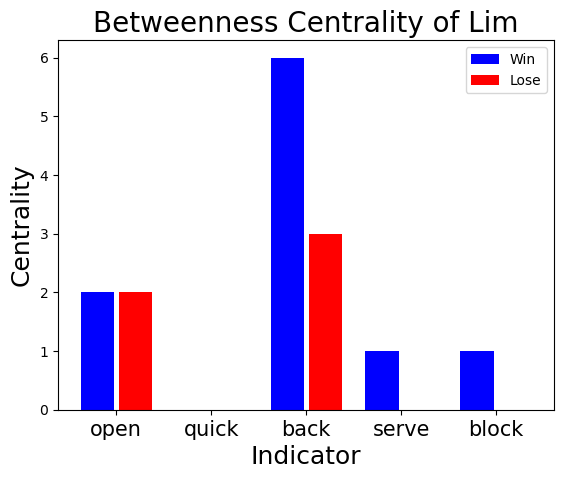

In [43]:
# 임동혁의 선발 출장 경기 비교 - 승리 vs 패배
p1 = plt.bar(index-0.2, Lim_win_value, width, color = 'blue') ## 승리 경기
p2 = plt.bar(index+0.2, Lim_lose_value, width, color = 'red') ## 패배 경기
plt.title('Betweenness Centrality of Lim', fontsize=20)
plt.xlabel('Indicator', fontsize=18)
plt.ylabel('Centrality', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend(["Win", "Lose"], loc=0)
plt.savefig('Stick_Graph_Lim.png')
plt.show()

# 비예나 9 경기 기록

## 비예나 지표

In [16]:
# 아포짓 지표를 정리한 엑셀 불러오기 - 비예나 지표
V_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁,비예나 지표.xlsx', sheet_name = '비예나3')
print(V_indicator)

   경기    오픈   퀵오픈    후위    서브   블로킹
0   1  0.83  0.87  0.85  0.90  0.90
1   2  0.87  0.86  0.73  0.89  0.78
2   3  0.74  0.68  0.64  0.96  0.44
3   4  0.71  0.80  0.80  0.93  0.93
4   5  0.79  0.91  0.62  0.96  1.00
5   6  0.82  0.86  0.65  1.00  1.00


## 비예나 지표 수치 변환

In [17]:
# betweeness centrality
# 가중치가 낮을수록 중심성 커짐
# 원래 수치는 값이 클수록 (+)
# 변환된 수치 = 1 - 원래 수치

V_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁,비예나 지표.xlsx', sheet_name = '비예나3')
print(V_indicator, '\n')

print(V_indicator['오픈'], '\n')

print(V_indicator['오픈'].values[0], '\n')

# 가중치1
V_weight1 = []
for i in range(6):
    V_weight1.append(V_indicator['오픈'].values[i])
for i in range(6):
    V_weight1.append(V_indicator['퀵오픈'].values[i])
for i in range(6):
    V_weight1.append(V_indicator['후위'].values[i])
for i in range(6):
    V_weight1.append(V_indicator['서브'].values[i])
for i in range(6):
    V_weight1.append(V_indicator['블로킹'].values[i])

    
# 가중치1의 type 변환 : numpy.float64 -> float
for i in range(30):
    V_weight1[i] = float(V_weight1[i])

print(V_weight1)    

   경기    오픈   퀵오픈    후위    서브   블로킹
0   1  0.83  0.87  0.85  0.90  0.90
1   2  0.87  0.86  0.73  0.89  0.78
2   3  0.74  0.68  0.64  0.96  0.44
3   4  0.71  0.80  0.80  0.93  0.93
4   5  0.79  0.91  0.62  0.96  1.00
5   6  0.82  0.86  0.65  1.00  1.00 

0    0.83
1    0.87
2    0.74
3    0.71
4    0.79
5    0.82
Name: 오픈, dtype: float64 

0.83 

[0.83, 0.87, 0.74, 0.71, 0.79, 0.82, 0.87, 0.86, 0.68, 0.8, 0.91, 0.86, 0.85, 0.73, 0.64, 0.8, 0.62, 0.65, 0.9, 0.89, 0.96, 0.93, 0.96, 1.0, 0.9, 0.78, 0.44, 0.93, 1.0, 1.0]


## 비예나 그래프 그리기 

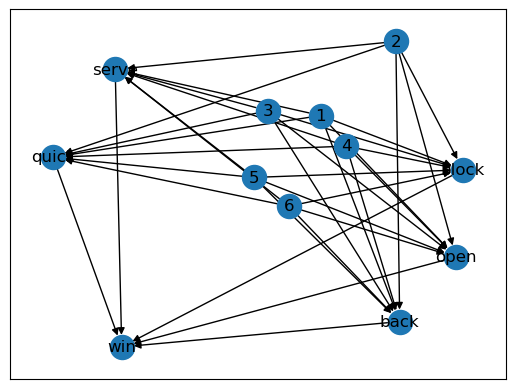

In [19]:
# 비예나 그래프
import networkx as nx2
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt2


V_game_node = ['1', '2', '3', '4', '5', '6']
V_indicator_node = ['open', 'quick', 'back', 'serve', 'block']
V_edges1 = []
V_edges2 = []

# game_node와 indicator_node 엣지 -> edge1에 저장
for i in V_indicator_node:
    for j in V_game_node:
        V_edges1.append((j, i)) 
        
# indicator_node와 'win' 엣지 -> edge2에 저장 
for elem in V_indicator_node:
    V_edges2.append((elem, 'win'))

# V_edge1에 V_weight1 추가   
for i in range(30):
    V_edges1[i] += (V_weight1[i],)
    
# V_edge2에 V_weight2 추가    
V_weight2 = [0.85, 0.90, 0.875, 0.825, 0.80]

for i in range(5):
    V_edges2[i] += (V_weight2[i],)
    

# 노드 추가
G_V = nx2.DiGraph()
G_V.add_node('win')
G_V.add_nodes_from(V_game_node)
G_V.add_nodes_from(V_indicator_node)


# 엣지 추가 + 가중치 추가
G_V.add_weighted_edges_from(V_edges1)
G_V.add_weighted_edges_from(V_edges2)



nx2.draw_networkx(G_V)

plt2.savefig('graph_v.png')
plt2.show()

## 매개중심성 구하기

In [20]:
V_btw_cent = nx.betweenness_centrality(G_V, k=None, normalized=False, weight='weight', endpoints=False, seed=None)

sorted_nodes = sorted(V_btw_cent.items(), key=lambda x:x[1], reverse=True)

print(sorted_nodes)

[('open', 2.0), ('back', 2.0), ('block', 2.0), ('win', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('quick', 0.0), ('serve', 0.0)]


## 막대 그래프 나타내기

In [37]:
label = ['open', 'quick', 'back', 'serve', 'block']
V_win_value = [2.0, 0.0, 2.0, 0.0, 2.0]
index = np.arange(len(label))

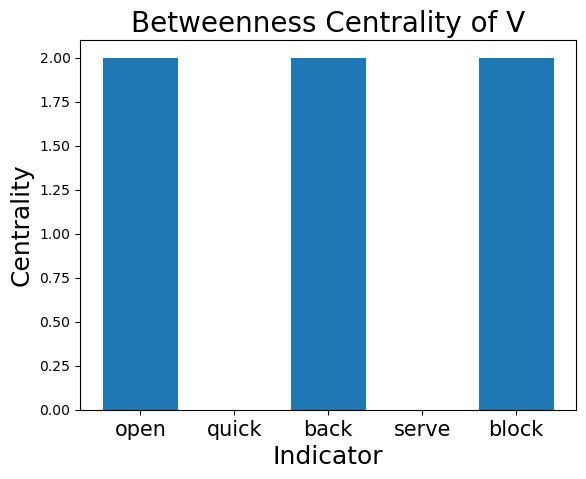

In [38]:
plt.bar(index, V_win_value)
plt.title('Betweenness Centrality of V', fontsize=20)
plt.xlabel('Indicator', fontsize=18)
plt.ylabel('Centrality', fontsize=18)
plt.xticks(index, label, fontsize=15)
#plt.savefig('Stick_Graph_V.png')
plt.show()

# 비예나 패배 3경기 기록

## 비예나 지표

In [23]:
# 아포짓 지표를 정리한 엑셀 불러오기 - 비예나 지표
V_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁, 비예나 패배 경기 지표.xlsx', sheet_name = '비예나3')
print(V_indicator)

   경기    오픈   퀵오픈    후위  서브  블로킹
0   1  0.98  0.94  0.91   1    1
1   2  0.81  0.89  0.78   1    1
2   3  0.67  1.00  0.76   1    1


## 비예나 지표 수치 변환

In [24]:
# betweeness centrality
# 가중치가 낮을수록 중심성 커짐
# 원래 수치는 값이 클수록 (+)
# 변환된 수치 = 1 - 원래 수치

V_indicator = pd.read_excel('/Users/ha-eun/Desktop/23-2 졸업프로젝트/임동혁, 비예나 패배 경기 지표.xlsx', sheet_name = '비예나3')
print(V_indicator, '\n')

print(V_indicator['오픈'], '\n')

print(V_indicator['오픈'].values[0], '\n')

# 가중치1
V_weight1 = []
for i in range(3):
    V_weight1.append(V_indicator['오픈'].values[i])
for i in range(3):
    V_weight1.append(V_indicator['퀵오픈'].values[i])
for i in range(3):
    V_weight1.append(V_indicator['후위'].values[i])
for i in range(3):
    V_weight1.append(V_indicator['서브'].values[i])
for i in range(3):
    V_weight1.append(V_indicator['블로킹'].values[i])

    
# 가중치1의 type 변환 : numpy.float64 -> float
for i in range(15):
    V_weight1[i] = float(V_weight1[i])

print(V_weight1)  

   경기    오픈   퀵오픈    후위  서브  블로킹
0   1  0.98  0.94  0.91   1    1
1   2  0.81  0.89  0.78   1    1
2   3  0.67  1.00  0.76   1    1 

0    0.98
1    0.81
2    0.67
Name: 오픈, dtype: float64 

0.98 

[0.98, 0.81, 0.67, 0.94, 0.89, 1.0, 0.91, 0.78, 0.76, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## 매개중심성 구하기

In [25]:
# 비예나 그래프
import networkx as nx2
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt2


V_game_node = ['1', '2', '3']
V_indicator_node = ['open', 'quick', 'back', 'serve', 'block']
V_edges1 = []
V_edges2 = []

# game_node와 indicator_node 엣지 -> edge1에 저장
for i in V_indicator_node:
    for j in V_game_node:
        V_edges1.append((j, i)) 
        
# indicator_node와 'win' 엣지 -> edge2에 저장 
for elem in V_indicator_node:
    V_edges2.append((elem, 'win'))

# V_edge1에 V_weight1 추가   
for i in range(15):
    V_edges1[i] += (V_weight1[i],)
    
# V_edge2에 V_weight2 추가    
V_weight2 = [0.85, 0.90, 0.875, 0.825, 0.80]

for i in range(5):
    V_edges2[i] += (V_weight2[i],)
    

# 노드 추가
G_V = nx2.DiGraph()
G_V.add_node('win')
G_V.add_nodes_from(V_game_node)
G_V.add_nodes_from(V_indicator_node)


# 엣지 추가 + 가중치 추가
G_V.add_weighted_edges_from(V_edges1)
G_V.add_weighted_edges_from(V_edges2)

V_btw_cent = nx.betweenness_centrality(G_V, k=None, normalized=False, weight='weight', endpoints=False, seed=None)

sorted_nodes = sorted(V_btw_cent.items(), key=lambda x:x[1], reverse=True)

print(sorted_nodes)

[('back', 2.0), ('open', 1.0), ('win', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('quick', 0.0), ('serve', 0.0), ('block', 0.0)]


## 막대 그래프 나타내기 

In [40]:
label = ['open', 'quick', 'back', 'serve', 'block']
V_lose_value = [1.0, 0.0, 2.0, 0.0, 0.0]
index = np.arange(len(label))
width = 0.35

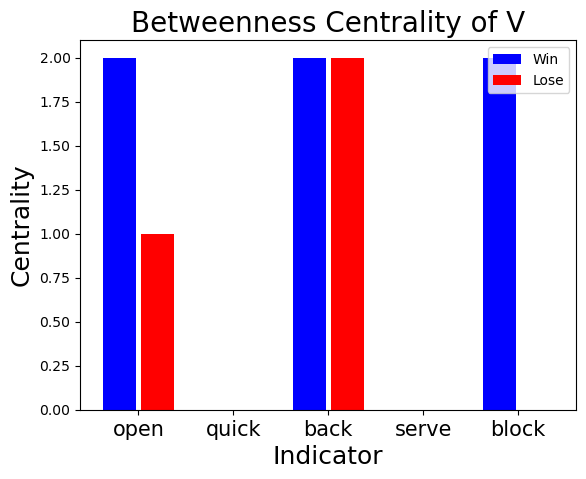

In [42]:
# 비예나 선발 출장 경기 - 승리 vs 패배
p1 = plt.bar(index-0.2, V_win_value, width, color = 'blue') ## 비예나 승리 경기
p2 = plt.bar(index+0.2, V_lose_value, width, color = 'red') ## 비예나 패배 경기
plt.title('Betweenness Centrality of V', fontsize=20)
plt.xlabel('Indicator', fontsize=18)
plt.ylabel('Centrality', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend(["Win", "Lose"], loc=0)
plt.savefig('Stick_Graph_V.png')
plt.show()

# 임동혁, 비예나 비교 그래프

## 임동혁, 비예나 승리 경기 비교 

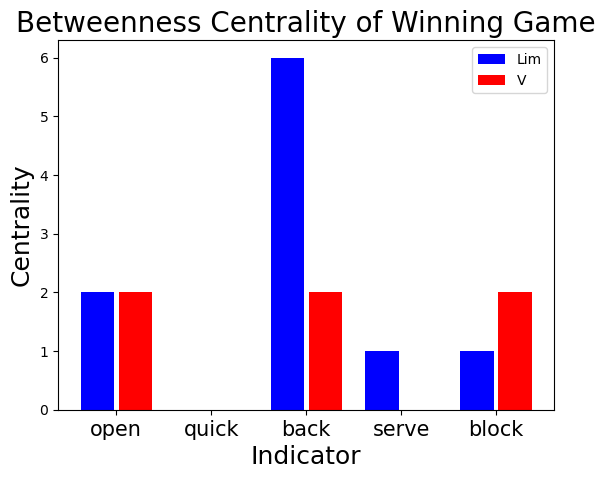

In [44]:
p1 = plt.bar(index-0.2, Lim_win_value, width, color = 'blue') ## 임동혁 승리 경기
p2 = plt.bar(index+0.2, V_win_value, width, color = 'red')## 비예나 패배 경기
plt.title('Betweenness Centrality of Winning Game', fontsize=20)
plt.xlabel('Indicator', fontsize=18)
plt.ylabel('Centrality', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend(["Lim", "V"], loc=0)
plt.savefig("Stick_Graph_Win.png")
plt.show()

## 임동혁, 비예나 패배 경기 비교

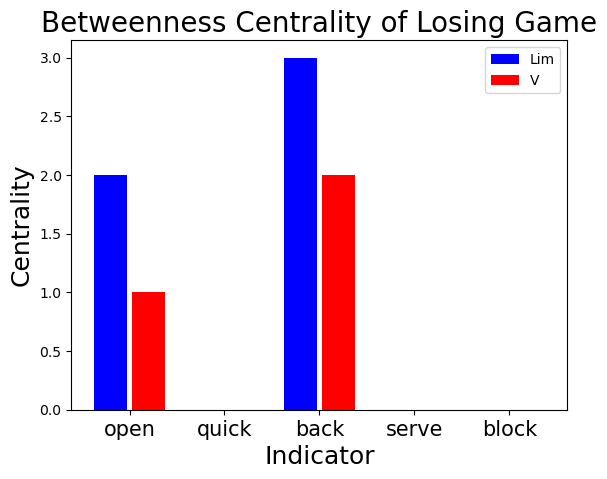

In [45]:
p1 = plt.bar(index-0.2, Lim_lose_value, width, color = 'blue') ## 임동혁 패배 경기
p2 = plt.bar(index+0.2, V_lose_value, width, color = 'red')## 비예나 승리 경기
plt.title('Betweenness Centrality of Losing Game', fontsize=20)
plt.xlabel('Indicator', fontsize=18)
plt.ylabel('Centrality', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend(["Lim", "V"], loc=0)
plt.savefig("Stick_Graph_Lose.png")
plt.show()